# IBM-HR

### ETL

In [1]:
! pip install seaborn --upgrade

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Requirement already up-to-date: seaborn in /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages (0.11.1)


In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_e62b6c1bb76c4710b1d1cc5aeab9a929 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_e62b6c1bb76c4710b1d1cc5aeab9a929 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_e62b6c1bb76c4710b1d1cc5aeab9a929)

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='IBM-HR-Data-Employee-Attrition.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df_IBM = df_data_1.copy()

In [4]:
df_IBM.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme(style = "dark")
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

### EDA

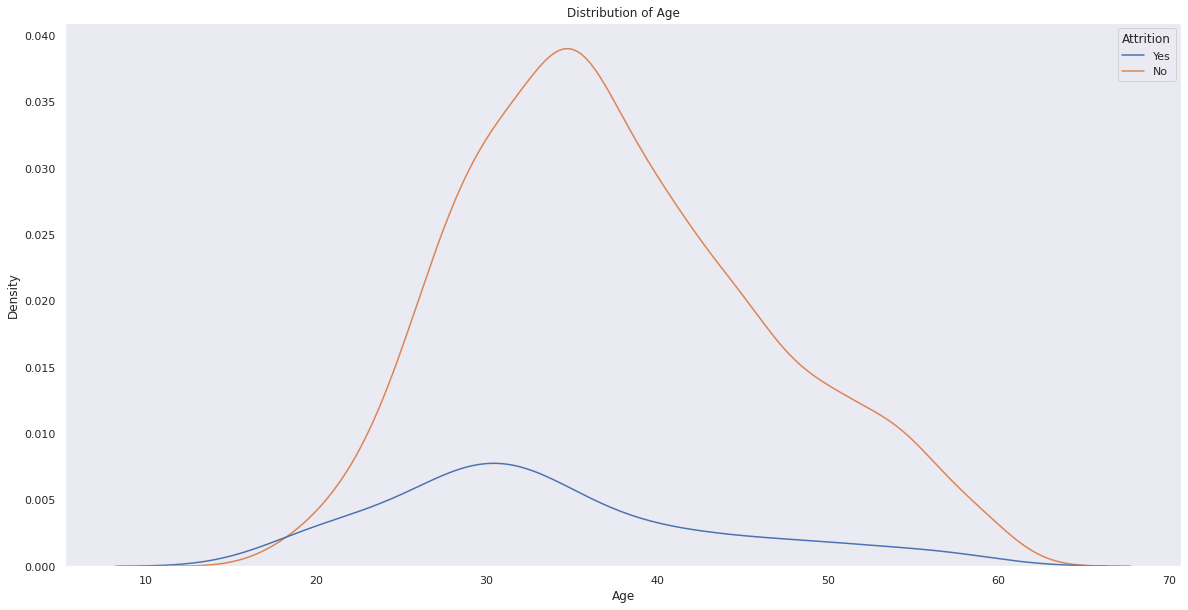

In [6]:
plt.figure(figsize = (20,10))
sns.kdeplot(x = 'Age', data = df_IBM, hue = "Attrition")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show();

### Predictive Model

In [7]:
IBM_x = df_IBM.drop("Attrition", axis = 1)

In [8]:
IBM_y = df_IBM.iloc[:,1]

In [9]:
IBM_y = IBM_y.replace(["Yes", "No"], [0,1])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(IBM_x, IBM_y, train_size = 0.8, random_state = 42)

In [11]:
from sklearn.preprocessing import OrdinalEncoder

In [12]:
col_pipeline = ColumnTransformer([("onehot", OneHotEncoder(), ["BusinessTravel","Department", "EducationField", "JobRole", "MaritalStatus","Gender", "Over18", "OverTime"])])

In [13]:
## fin_pipeline = Pipeline([("col", col_pipeline), ("kpca", KernelPCA()), ("vot", VotingClassifier(estimators=[('sgd', SGDClassifier()), ('rnd', RandomForestClassifier())]))])
fin_pipeline = Pipeline([("col", col_pipeline), ("kpca", KernelPCA()), ("rnd", RandomForestClassifier())])

In [14]:
param_grid = [{"kpca__n_components": np.arange(2,10), "rnd__n_estimators": np.arange(1,50)}]
grid_search = GridSearchCV(fin_pipeline, param_grid, cv = 5)

In [15]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col',
                                        ColumnTransformer(transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         ['BusinessTravel',
                                                                          'Department',
                                                                          'EducationField',
                                                                          'JobRole',
                                                                          'MaritalStatus',
                                                                          'Gender',
                                                                          'Over18',
                                                                          'OverTime'])])),
                                       ('kpca', Kernel

In [16]:
grid_search.best_estimator_

Pipeline(steps=[('col',
                 ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'JobRole',
                                                   'MaritalStatus', 'Gender',
                                                   'Over18', 'OverTime'])])),
                ('kpca', KernelPCA(n_components=6)),
                ('rnd', RandomForestClassifier(n_estimators=45))])

In [17]:
grid_search.best_params_

{'kpca__n_components': 6, 'rnd__n_estimators': 45}

In [18]:
grid_search.best_score_

0.8180310133429499

In [19]:
fin_model = grid_search.best_estimator_

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [21]:
cross_val_score(fin_model, x_train, y_train, cv = 5)

array([0.80932203, 0.82978723, 0.80851064, 0.80425532, 0.79148936])

In [23]:
fin_model["rnd"].feature_importances_

array([0.13833946, 0.13748027, 0.27159006, 0.15728242, 0.13570031,
       0.15960748])

In [24]:
y_train_pred = cross_val_predict(fin_model, x_train, y_train, cv = 5)

In [25]:
x_train_new = x_train.copy()

In [26]:
x_train_new["Actual Attrition"] = y_train
x_train_new["Predicted Attrition"] = y_train_pred
x_train_new.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Actual Attrition,Predicted Attrition
1097,24,Travel_Rarely,350,Research & Development,21,2,Technical Degree,1,1551,3,...,3,2,3,3,1,1,0,0,1,0
727,18,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,...,0,0,2,3,0,0,0,0,1,1
254,29,Travel_Rarely,1247,Sales,20,2,Marketing,1,349,4,...,1,10,2,3,3,2,0,2,1,1
1175,39,Travel_Rarely,492,Research & Development,12,3,Medical,1,1654,4,...,0,7,3,3,5,4,1,0,1,1
1341,31,Travel_Rarely,311,Research & Development,20,3,Life Sciences,1,1881,2,...,1,10,2,3,10,8,0,2,1,1


In [27]:
precision, recall, threshold = precision_recall_curve(y_train, y_train_pred)

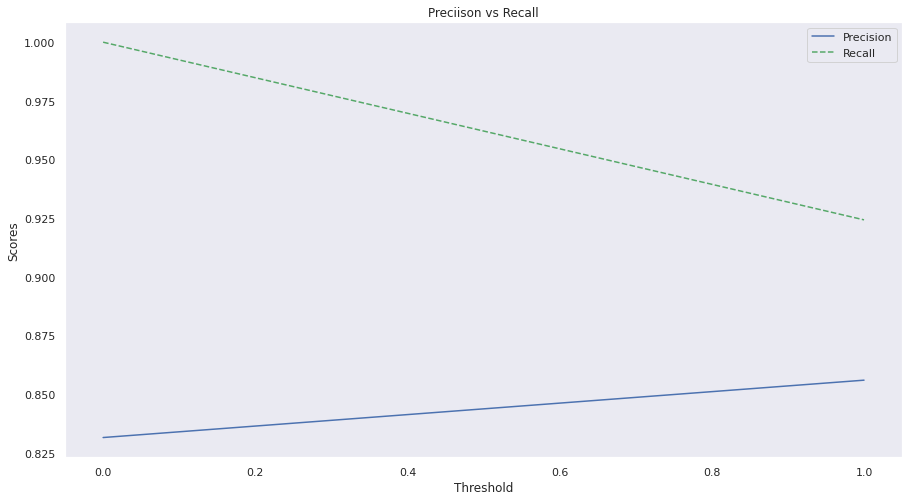

In [30]:
plt.figure(figsize = (15,8))
plt.plot(threshold, precision[:-1], "b-", label = "Precision")
plt.plot(threshold, recall[:-1], "g--", label = "Recall")
plt.title("Precision vs Recall")
plt.xlabel("Threshold")
plt.ylabel("Scores")
plt.legend()
plt.show();

In [31]:
precision_score(y_train, y_train_pred)

0.8560606060606061

In [32]:
recall_score(y_train, y_train_pred)

0.9243353783231084

In [33]:
accuracy_score(y_train, y_train_pred)

0.8078231292517006

In [34]:
f1_score(y_train, y_train_pred)

0.888888888888889

In [35]:
conf = confusion_matrix(y_train, y_train_pred)

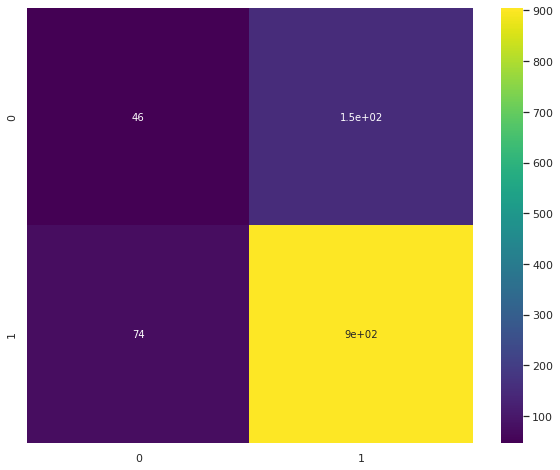

In [36]:
plt.figure(figsize = (10,8))
sns.heatmap(conf, annot = True, cmap = "viridis")
plt.show();

In [37]:
y_pred = fin_model.predict(x_test)

In [38]:
x_test_new = x_test.copy()

In [39]:
x_test_new["Actual Attrition"] = y_test
x_test_new["Predicted Attrition"] = y_pred
x_test_new.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Actual Attrition,Predicted Attrition
1041,28,Travel_Rarely,866,Sales,5,3,Medical,1,1469,4,...,0,6,4,3,5,4,1,3,1,1
184,53,Travel_Rarely,1084,Research & Development,13,2,Medical,1,250,4,...,2,5,3,3,4,2,1,3,1,1
1222,24,Travel_Rarely,240,Human Resources,22,1,Human Resources,1,1714,4,...,1,1,2,3,1,0,0,0,0,1
67,45,Travel_Rarely,1339,Research & Development,7,3,Life Sciences,1,86,2,...,1,25,2,3,1,0,0,0,1,1
220,36,Travel_Rarely,1396,Research & Development,5,2,Life Sciences,1,304,4,...,0,16,3,4,13,11,3,7,1,1


In [44]:
def score(df, df2):
    pre = precision_score(df, df2)
    rec = recall_score(df, df2)
    acc = accuracy_score(df, df2)
    f1 = f1_score(df, df2)
    df3 = pd.DataFrame({"score":[pre, rec, acc, f1]}, index = ["precision score", "recall score", "accuracy score", "f1_score"])
    return df3

In [45]:
score(y_test, y_pred)

,score
precision score,0.881041
recall score,0.929412
accuracy score,0.829932
f1_score,0.904580


In [46]:
conf2 = confusion_matrix(y_test, y_pred)

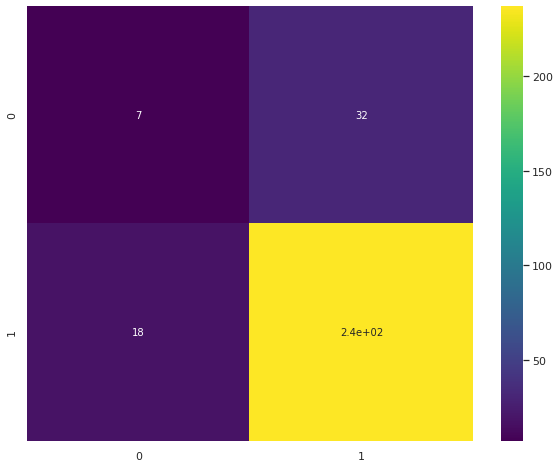

In [47]:
plt.figure(figsize = (10,8))
sns.heatmap(conf2, annot = True, cmap = "viridis")
plt.show();